In [56]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn import cross_validation
from scipy.stats import spearmanr
__author__ = 'amanda'

feature_arr = pd.read_csv('../clean_data/reordered_social_feature.csv')

attract_y = feature_arr['attractive']
attract_y = attract_y.values

feature_x = feature_arr.drop(['attractive','unattractive'], axis=1)
x_fields = list(feature_x.columns.values)
feature_x = feature_x.values

pca = PCA()
pca_feature = pca.fit_transform(feature_x)
pca_score = pca.explained_variance_ratio_
pca_components = pca.components_
# pca_score
# pca_score.cumsum()

In [57]:
# To check if PCA helps improving the performance. 
print pca_feature.shape

(2207, 38)


In [61]:
test_error_list = np.zeros((pca_feature.shape[1], 1))

for cur_feature_num in range(pca_feature.shape[1]):
    # Run linear regression multiple times. 
    itr_num = 100
    test_corr_list = np.zeros((itr_num, 1))

#     coef_list = np.zeros((len(x_fields), itr_num))
#     intercept_list = np.zeros((itr_num, 1))
#     alpha_list = np.zeros((itr_num, 1))

    feature_x = pca_feature[:, :cur_feature_num+1]
    for cur_itr in range(itr_num):
        
        x_train, x_test, y_train, y_test = cross_validation.train_test_split(feature_x, attract_y, test_size=0.5)
        clf = linear_model.RidgeCV(alphas=np.logspace(-4, 10, num=30))
        clf.fit(x_train, y_train)

#         coef_list[:, cur_itr] = clf.coef_
#         intercept_list[cur_itr] = clf.intercept_
#         alpha_list[cur_itr] = clf.alpha_    

        y_test_pred = clf.predict(x_test)
        corr = spearmanr(y_test, y_test_pred)
        test_corr_list[cur_itr] = corr[0]

    test_error_list[cur_feature_num] = test_corr_list.mean()

In [62]:
test_error_list

array([[ 0.52968416],
       [ 0.67436261],
       [ 0.68514336],
       [ 0.72217029],
       [ 0.72456231],
       [ 0.74619211],
       [ 0.78146533],
       [ 0.78500997],
       [ 0.78643962],
       [ 0.78926819],
       [ 0.78939796],
       [ 0.79213615],
       [ 0.80122791],
       [ 0.80930792],
       [ 0.81133514],
       [ 0.81074589],
       [ 0.81687841],
       [ 0.81427925],
       [ 0.81596652],
       [ 0.81594068],
       [ 0.81671638],
       [ 0.81702654],
       [ 0.81784546],
       [ 0.81667015],
       [ 0.8175009 ],
       [ 0.81887668],
       [ 0.82007124],
       [ 0.8210931 ],
       [ 0.81994965],
       [ 0.81854785],
       [ 0.81937621],
       [ 0.81993744],
       [ 0.82064051],
       [ 0.82055931],
       [ 0.81864433],
       [ 0.81859709],
       [ 0.8193018 ],
       [ 0.8189851 ]])

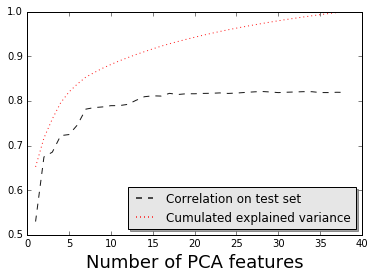

In [79]:
N = len(test_error_list)
x = np.arange(1, N+1)

fig, ax = plt.subplots()
ax.plot(x, test_error_list, 'k--', alpha=0.9, label='Correlation on test set')
ax.plot(x, pca_score.cumsum(), 'r:', alpha=0.9, label='Cumulated explained variance')

# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    

plt.xlabel('Number of PCA features', fontsize=18)

fig.savefig('../figs/corr_var_featNum.jpg')  
plt.show()
